In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Carga y estudio de la estructura del dataset

In [3]:
# Cargamos el dataset 
data = pd.read_csv('equipment_anomaly_data.csv')

In [4]:
# Mostramos cantidad total de registros y columnas
data.shape

# Guardamos la variable target
target = 'faulty'

(7672, 7)

In [5]:
# Mostramos el tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [6]:
# Decribimos las columnas numericas
data.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [8]:
# Mostramos los primeros y los ultimos 5 registros 
# Mostramos los primeros 5 registros
data.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [7]:
# Mostramos los últimos 5 registros
data.tail()

,temperature,pressure,vibration,humidity,equipment,location,faulty
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0
7671,28.468054,66.588978,4.677368,79.670225,Turbine,Chicago,1.0


#### 2. Limpieza de datos (data cleaning)

##### 2.1 Visualizacion de outliers mediante boxplots

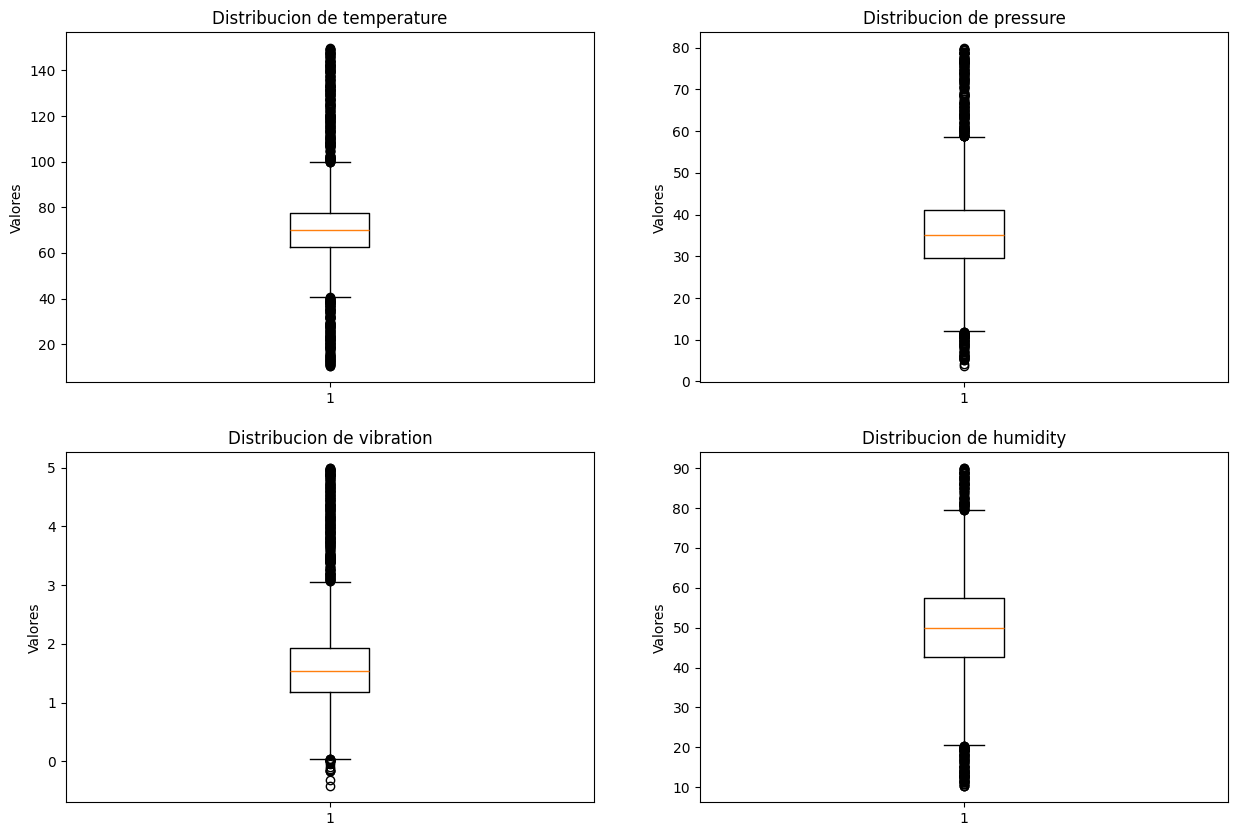

In [12]:
columnas_outliers = ['temperature','pressure','vibration','humidity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(columnas_outliers):
    axes[i].boxplot(data[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(columnas_outliers), len(axes)):
    axes[j].axis('off')

plt.show()

In [18]:
# Eliminacion de outliers mediante deteccion del rango intercuartilico

Q1 = data[columnas_outliers].quantile(0.25)
Q3 = data[columnas_outliers].quantile(0.75)
IQR = Q3 - Q1

# Definimos los valores limites inferiores y superiores

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtramos los datos que estan fuera del limite inferior y superior

data_clean = data[~((data[columnas_outliers] < lower_limit) | (data[columnas_outliers] > upper_limit)).any(axis=1)]

# Mostramos la cantidad de datos antes y despues de la limpieza

print("Cantidad de datos antes de la limpieza:", data.shape[0])
print("Cantidad de datos despues de la limpieza:", data_clean.shape[0])

Cantidad de datos antes de la limpieza: 7672
Cantidad de datos despues de la limpieza: 6914
